<a href="https://colab.research.google.com/github/johnjar99/curso_python-/blob/main/Talentpitch_technical_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Prueba Técnica Analista de datos Junior en TalentPitch


##Limpieza de datos
Verifique los valores faltantes y trátelos apropiadamente para el análisis posterior. Recomendamos usar la biblioteca Missingno para visualizar valores faltantes. Sin embargo, tenga cuidado ya que algunos campos pueden parecer contener datos pero puede estar vacío o inválido

In [95]:
#Importar las librerias necesarias
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
# Cargar bases de Datos
usuarios = pd.read_csv('Usuarios.csv')
usuarios_sinprocesar = pd.read_csv('Usuarios_Sinprocesar.csv')
# Unir los dos dataframes en uno solo usando un 'inner join'
Usuarios_general = pd.merge(usuarios, usuarios_sinprocesar, left_on='user_id', right_on='id')

# Verificar el resultado
Usuarios_general.head()

,user_id,desired_state,last_role,dreamt_companies,forms_to_work,benefits_sought,my_languages,last_study,level_last_study,interested_areas,...,match_with_playlists,contents_viewed,connections_sent,id,created_at,birthdate,gender,city,state,profile_completed
0,1.0,freelancer,CTO,['https://www.apple.com/'],"['virtual', 'mixed', 'in_house']","['bonuses', 'flexible_schedules', 'personal_re...","[['ES', 'advanced'], ['EN', 'advanced', None]]",Ingeniería de Sistemas,other,"['Calidad de Software', 'Formación', 'Tecnolog...",...,NaN,NaN,2.0,1,2016-01-07 18:10:23,1978-11-13,M,Bogotá,Cundinamarca,96.0
1,9670.0,entrepreneur,Líder en gestión de procesos,"['https://www.rutanmedellin.org/es/', 'http://...","['in_house', 'mixed']","['bonuses', 'study_opportunities', 'scholarshi...",[],Tecnología en sistemas electromecánicos,other,"['Física', 'Diseño', 'Ecología', 'Tecnología',...",...,NaN,NaN,NaN,9670,2017-08-08 10:04:57,1998-02-17,F,Medellín,Antioquia,66.0
2,23825.0,employment,Líder de proyectos Masivos,"['https://www.medtronic.com/co-es/index.html',...","['virtual', 'in_house', 'mixed']","['flexible_schedules', 'study_opportunities', ...",[],Bioingeniería,NaN,"['Starups', 'Marketing Digital Móvil', 'Progra...",...,NaN,NaN,NaN,23825,2019-04-10 16:57:08,1985-06-27,M,Medellín,Antioquia,59.0
3,2245.0,employment,Lider de desarollo,"[None, None, None]",[],[],"[[None, None, None]]",Ingeniería de Sistemas,other,"['Desarrollo de software', 'asf;aslkf;aslkfa;s...",...,NaN,NaN,5.0,2245,2016-07-25 10:37:25,1992-10-19,M,Medellín,Antioquia,48.0
4,24328.0,freelancer,Diseñadora Gráfica Freelancer,"['https://www.kalley.com.co/', 'https://www.ma...",['virtual'],"['study_opportunities', 'flexible_schedules', ...","[[None, None, None]]",Gestión Del Diseño Gráfico,other,"['Diseño gráfico', 'Mercadeo', 'marketing digi...",...,NaN,NaN,2.0,24328,2019-06-27 12:35:22,2001-05-09,F,Medellín,Antioquia,98.0


<Axes: >

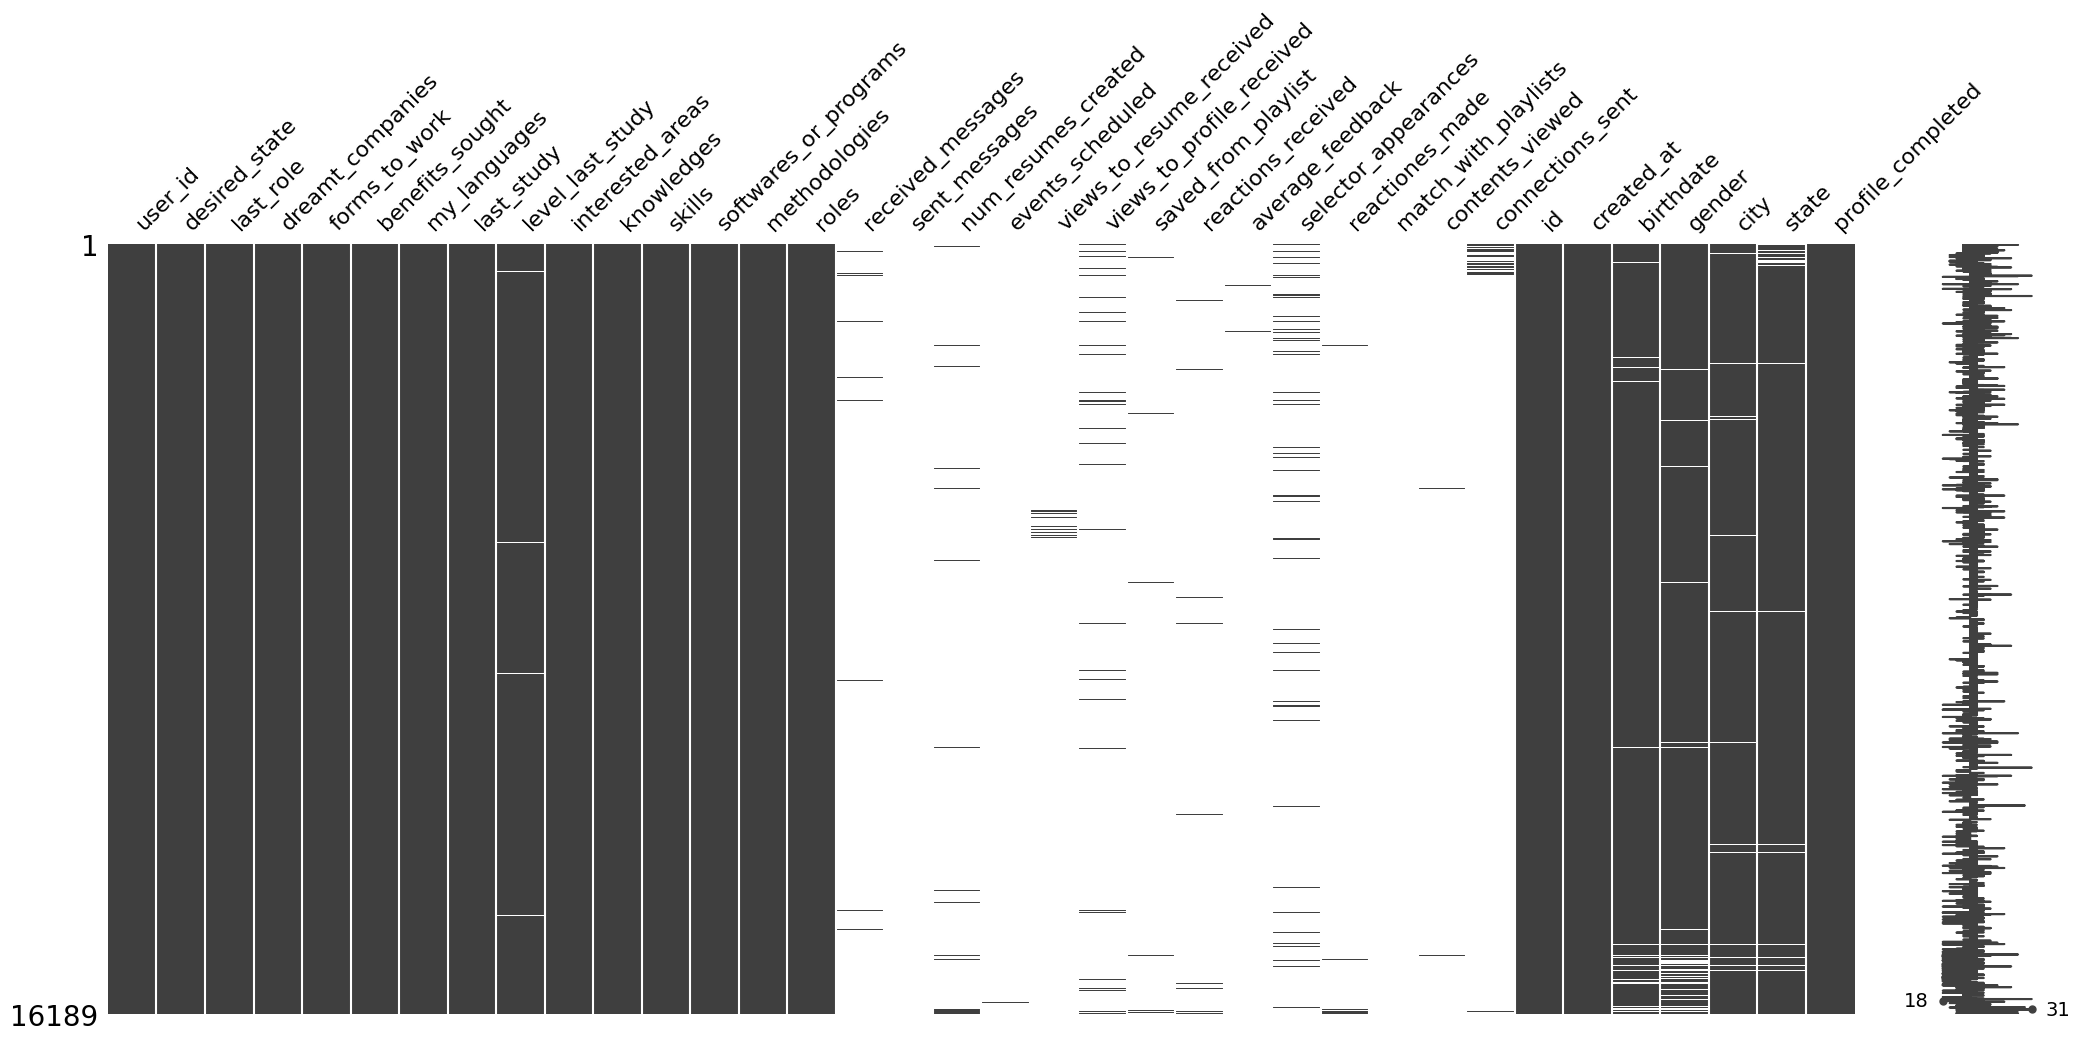

In [97]:
# Verificar valores faltantes en el DataFrame Usuarios_general
msno.matrix(Usuarios_general)

In [98]:
# Verificar los valores faltantes en el DataFrame Usuarios_general
valores_faltantes = Usuarios_general.isnull().sum()
porcentaje_faltante = (valores_faltantes / len(Usuarios_general)) * 100

resumen_faltantes = pd.DataFrame({
    'Columna': valores_faltantes.index,
    'Valores Faltantes': valores_faltantes.values,
    'Porcentaje Faltante': porcentaje_faltante.values
})

print(resumen_faltantes)


                      Columna  Valores Faltantes  Porcentaje Faltante
0                     user_id                  0             0.000000
1               desired_state                  0             0.000000
2                   last_role                 21             0.129718
3            dreamt_companies                  0             0.000000
4               forms_to_work                  0             0.000000
5             benefits_sought                  0             0.000000
6                my_languages                  0             0.000000
7                  last_study                  0             0.000000
8            level_last_study                117             0.722713
9            interested_areas                  0             0.000000
10                 knowledges                  0             0.000000
11                     skills                  0             0.000000
12      softwares_or_programs                  0             0.000000
13              meth

Podemos ver que existe un problema grande de datos faltantes en algunas columnas, en las cuales el porcentaje de datos faltantes incluso llega a sobrepasar el $90\%$, necesitamos conocer cual la causa de esto, y cual es el estudio de esas columnas y si son de importancia para el análisis de la empresa. (En caso tal que la información de estas columnas no sea muy relevante para los análisis posteriores, se recomienda eliminarlas, debido a la poca información que aportan)

In [99]:
# Verificar los tipos de datos en el DataFrame Usuarios_general
tipos_datos = Usuarios_general.dtypes
print(tipos_datos)

user_id                      float64
desired_state                 object
last_role                     object
dreamt_companies              object
forms_to_work                 object
benefits_sought               object
my_languages                  object
last_study                    object
level_last_study              object
interested_areas              object
knowledges                    object
skills                        object
softwares_or_programs         object
methodologies                 object
roles                         object
received_messages            float64
sent_messages                float64
num_resumes_created          float64
events_scheduled             float64
views_to_resume_received     float64
views_to_profile_received    float64
saved_from_playlist          float64
reactions_received           float64
average_feedback             float64
selector_appearances         float64
reactiones_made              float64
match_with_playlists         float64
c

Para poder trabajar con nuestra base de datos para nuestros proximos análisis, necesitamos rellenar los vlaores en los cuales el porcentaje de datos faltantes es muy grande, por lo tanto, existen diferentes metodos de imputación para realziar esto, pero como la cantidad es tan grande, cualquier tipo de imputación afectaria el comportamiento natural de la distribución de los datos y su comportamiento para posible porblematicas presentandas, por lo tanto se decidio utilizar 0 en los valores NaN pra poder trabajar con la base de datos.

In [100]:
# Reemplazar los valores NaN por 0 en las columnas donde los dantos faltantes es muy grande.
columnas = ['received_messages', 'sent_messages', 'num_resumes_created', 'events_scheduled', 'views_to_resume_received', 'views_to_profile_received', 'saved_from_playlist', 'reactions_received', 'average_feedback', 'selector_appearances', 'reactiones_made', 'match_with_playlists', 'contents_viewed', 'connections_sent']
Usuarios_general[columnas] = Usuarios_general[columnas].fillna(0)

Ahora trataremos de realizar metodos de imputación para las variables donde la cantidad de datos faltantes es baja, esto nos permitira tener mas control sobre la distribución de esatas variables, suponinedo que la distribución original de los datos no sera alterada despues de realizada la imputación.



*  Para "last_role", debido a que no podemos suponer sin antes poder tener un acercamiento con más profundidad de cada persona, su último rol, se decide trabajar con los datos que estén completos y eliminar los faltantes. (Este mismo procedimiento se aplicará para las variables "level_last_study", "city", "state"y "created_at")





In [101]:
#Vamos a imputar la variable género el método de imputación que realizaremos es, reemplazar los valor NaN con "Otro"
#esto nos permite realizar de manera inclusiva los datos faltantes sin suponer el género de la persona.
# Definir una función para aplicar a la columna
def impute_gender(value):
    if value == 'M' or value == 'F':
        return value
    else:
        return 'Otro'

# Aplicar la función a la columna 'gender'
Usuarios_general['gender'] = Usuarios_general['gender'].apply(impute_gender)

In [102]:
# Imputamos los datos faltantes de fecha de nacimiento utilizando el método de imputación por valor mas comun (moda)
#esto nos permite rellenar los valores faltantes sin dañar la distribución de los datos, debido a que el porcentaje de datos faltantes
#es baja además que la moda es una medida de tendencia central que se ajusta a la distribución original.
# Convertir la columna a datetime
Usuarios_general['birthdate'] = pd.to_datetime(Usuarios_general['birthdate'])

# Obtener el valor más frecuente de las fechas de cumpleaños existentes
valor_mas_frecuente = Usuarios_general['birthdate'].mode().values[0]

# Reemplazar los valores faltantes por el valor más frecuente
Usuarios_general['birthdate'].fillna(valor_mas_frecuente, inplace=True)

In [103]:
## Observamos que no existan datos faltantes o nulos, y verificamos el tipo de dato de cada variable.
Usuarios_general.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16189 entries, 0 to 16188
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   user_id                    16189 non-null  float64       
 1   desired_state              16189 non-null  object        
 2   last_role                  16168 non-null  object        
 3   dreamt_companies           16189 non-null  object        
 4   forms_to_work              16189 non-null  object        
 5   benefits_sought            16189 non-null  object        
 6   my_languages               16189 non-null  object        
 7   last_study                 16189 non-null  object        
 8   level_last_study           16072 non-null  object        
 9   interested_areas           16189 non-null  object        
 10  knowledges                 16189 non-null  object        
 11  skills                     16189 non-null  object        
 12  soft

In [104]:
#Debido a que existen valores de list de la forma "[]", los cuales no aparecen como datos faltantes, lo que haremso es rellenar estas listan
#intruciendo en ellas "no informado", y asi tratar de rellenar valores faltantes los cuales no aprecen como NaN
# Identificar las listas vacías en cada columna del DataFrame
listas_vacias = Usuarios_general.applymap(lambda x: x == []).any()

# Obtener los nombres de las columnas con listas vacías
columnas_con_listas_vacias = listas_vacias[listas_vacias].index.tolist()

#Rellenar las listas
Usuarios_general[columnas_con_listas_vacias] = Usuarios_general[columnas_con_listas_vacias].applymap(lambda x: "no informado" if x == [] else x)

                      Columna  Valores Faltantes  Porcentaje Faltante
0                     user_id                  0                  0.0
1               desired_state                  0                  0.0
2                   last_role                  0                  0.0
3            dreamt_companies                  0                  0.0
4               forms_to_work                  0                  0.0
5             benefits_sought                  0                  0.0
6                my_languages                  0                  0.0
7                  last_study                  0                  0.0
8            level_last_study                  0                  0.0
9            interested_areas                  0                  0.0
10                 knowledges                  0                  0.0
11                     skills                  0                  0.0
12      softwares_or_programs                  0                  0.0
13              meth

<Axes: >

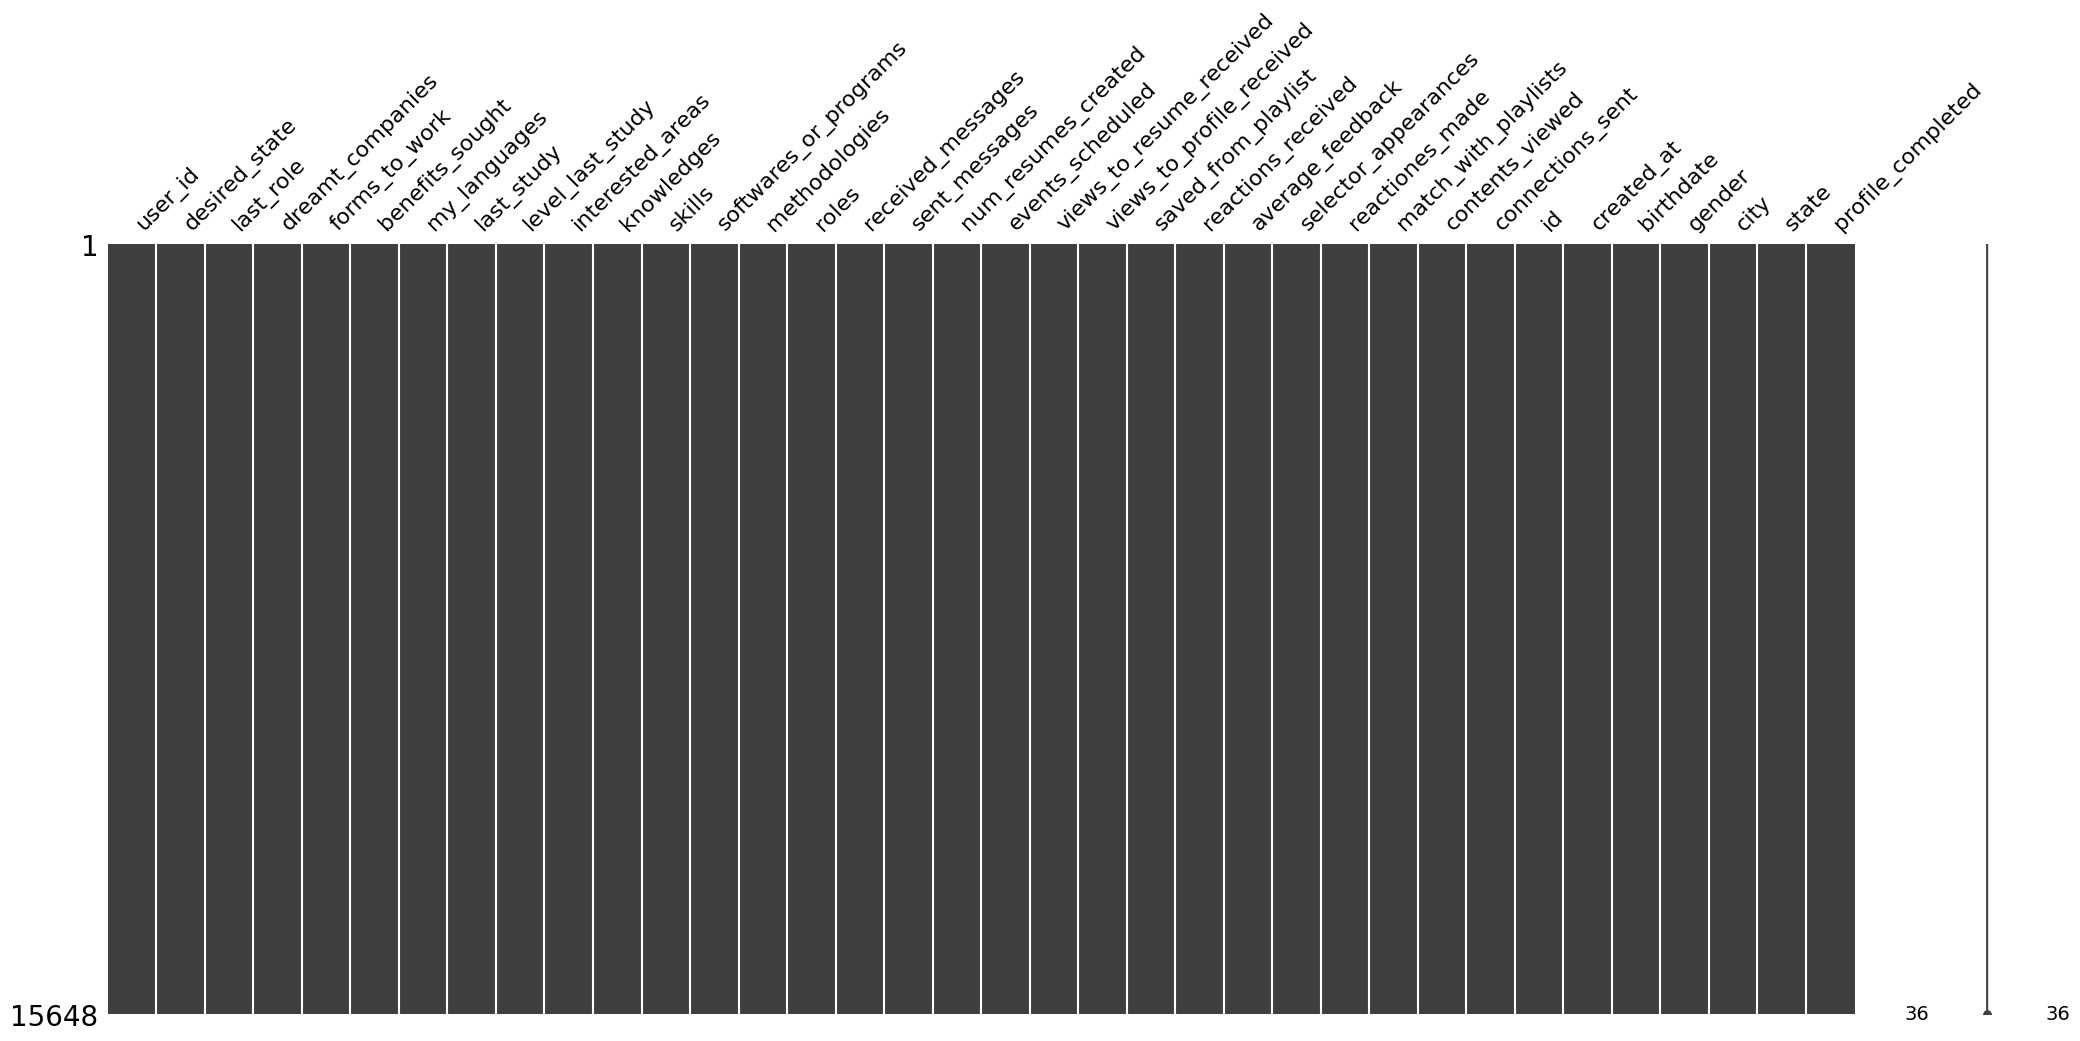

In [105]:
#Data frame final (Limpieza de datos)
Usuarios_clean=Usuarios_general.dropna()

# Verificar los valores faltantes en el DataFrame Usuarios_clean
valores_faltantes = Usuarios_clean.isnull().sum()
porcentaje_faltante = (valores_faltantes / len(Usuarios_clean)) * 100

resumen_faltantes = pd.DataFrame({
    'Columna': valores_faltantes.index,
    'Valores Faltantes': valores_faltantes.values,
    'Porcentaje Faltante': porcentaje_faltante.values
})

print(resumen_faltantes)

# Verificar valores faltantes en el DataFrame Usuarios_general
msno.matrix(Usuarios_clean)

##Descubrimiento de información

 Cree tablas que muestren información interesante. Seleccione al menos dos de las siguientes perspectivas y cree una perspectiva adicional que encuentre interesante.


*   Tasa de finalización del perfil a lo largo del tiempo

In [106]:
Usuarios_clean['created_at'] = pd.to_datetime(Usuarios_clean['created_at'])
Usuarios_clean['profile_completed'] = Usuarios_clean['profile_completed'].astype(int)

tasa_finalizacion_perfil = Usuarios_clean.groupby('created_at')['profile_completed'].mean().reset_index()
tasa_finalizacion_perfil.columns = ['created_at', 'Tasa de Finalización del Perfil']

tasa_finalizacion_perfil

<ipython-input-106-aea801812293>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-106-aea801812293>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,created_at,Tasa de Finalización del Perfil
0,2016-01-07 18:10:23,98.0
1,2016-01-18 17:28:56,84.0
2,2016-01-18 17:28:57,100.0
3,2016-01-18 17:29:03,90.0
4,2016-02-04 08:20:30,64.0
...,...,...
15588,2023-04-14 16:19:33,70.0
15589,2023-04-15 09:36:45,52.0
15590,2023-04-15 16:03:38,51.0
15591,2023-04-17 12:23:43,44.0



*   Top 5 de roles con el mayor "promedio_retroalimentación" por género

In [107]:
top_roles_por_genero = Usuarios_clean.groupby(['gender', 'roles'])['average_feedback'].mean().reset_index()
top_roles_por_genero = top_roles_por_genero.groupby('gender').apply(lambda x: x.nlargest(5, 'average_feedback')).reset_index(drop=True)

top_roles_por_genero

,gender,roles,average_feedback
0,F,"['Más prueba', 'Diseñadora UX']",5.00
1,F,['CEO en una empresa Legaltech'],4.75
2,F,['Coordinador/Líder de Sistemas de Gestión Int...,4.75
3,F,['Dirección'],4.60
4,F,['Desarrollador Backend / Data analyst'],4.50
5,M,['Consultor Empaques ecológicos'],5.00
6,M,['Consultor BI - DDDM Process'],5.00
7,M,['Líder Innovación y Transformación Digital'],5.00
8,M,"['CEO de la compañia', 'ceo los picapiedras', ...",4.67
9,M,['prueba'],4.67



*    Perspectiva adicional (Género en relación al área de interés "desarrollo de sofware", y el último nivel de estudio)

In [108]:
df_desarrolladores = Usuarios_clean[Usuarios_clean['interested_areas'].apply(lambda x: 'Desarrollo de Software' in x)]

tabla_relacion = df_desarrolladores.groupby(['gender', 'level_last_study']).size().reset_index(name='Count')

print(tabla_relacion)

   gender level_last_study  Count
0       F         bachelor     26
1       F        doctorate      1
2       F    master_degree     22
3       F            other    114
4       F   specialization     50
5       F        technical     82
6       F     technologist    123
7       F    undergraduate    286
8       M         bachelor    145
9       M        doctorate      4
10      M         finished      2
11      M    master_degree    101
12      M            other    573
13      M         practice      1
14      M   specialization    213
15      M          stopped      1
16      M        technical    406
17      M     technologist    624
18      M    undergraduate   1345
19   Otro         bachelor     10
20   Otro    master_degree      1
21   Otro            other     26
22   Otro   specialization     10
23   Otro        technical     22
24   Otro     technologist     49
25   Otro    undergraduate     71


##Visualización

Crea al menos tres de las siguientes parcelas y desarrolle
dos adicionales que te parezcan útiles o interesantes


*   Gráfica de barras apiladas de formas_de_trabajo por nivel_último_estudio

In [109]:
import plotly.express as px

# Desglosar las listas en filas separadas
Usuarios_clean_ex = Usuarios_clean.explode('forms_to_work')

# Agrupar y contar las formas_de_trabajo por nivel_último_estudio
grouped = Usuarios_clean_ex.groupby(['level_last_study', 'forms_to_work']).size().unstack()

# Crear la gráfica de barras apiladas con Plotly
fig = px.bar(grouped, barmode='stack')

fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1223: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1223: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1223: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fr

*  Diagrama de dispersión de edad contra promedio_retroalimentación

In [110]:
# Visualización: Diagrama de dispersión de edad contra promedio_retroalimentación
#Primero necesitamos encontrar la edad, en función a la fecha de cumpleaños, de la siguiente forma:

from datetime import datetime
Usuarios_clean['age'] = datetime.now().year - Usuarios_clean['birthdate'].dt.year

# Data frame para porder crear el diagrama de dispersión:
scatter_df = Usuarios_clean[['age', 'average_feedback']]

fig = px.scatter(scatter_df, x='age', y='average_feedback')

fig.show()


<ipython-input-110-163b4aef5548>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



*   Gráfico de línea de conexiones_enviadas a lo largo del tiempo

<ipython-input-111-e8bbb3f8daf7>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



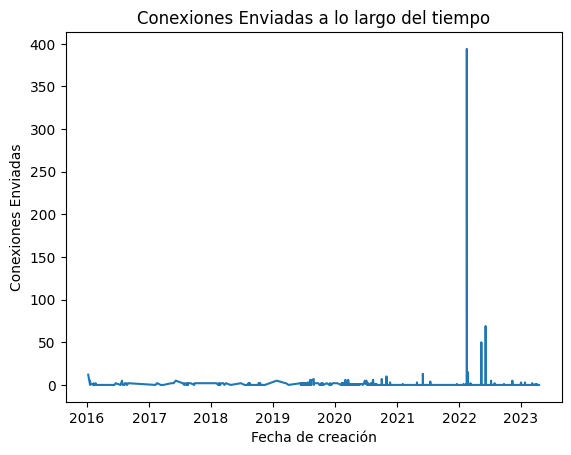

In [111]:
Usuarios_clean['created_at'] = pd.to_datetime(Usuarios_clean['created_at'])
conexiones_enviadas_por_fecha = Usuarios_clean.groupby('created_at')['connections_sent'].sum()

# Visualización: Gráfico de línea de conexiones_enviadas a lo largo del tiempo
plt.plot(conexiones_enviadas_por_fecha.index, conexiones_enviadas_por_fecha.values)
plt.xlabel('Fecha de creación')
plt.ylabel('Conexiones Enviadas')
plt.title('Conexiones Enviadas a lo largo del tiempo')
plt.show()


*   Gráfico de barras de empresas_soñadas por nivel_último_estudio

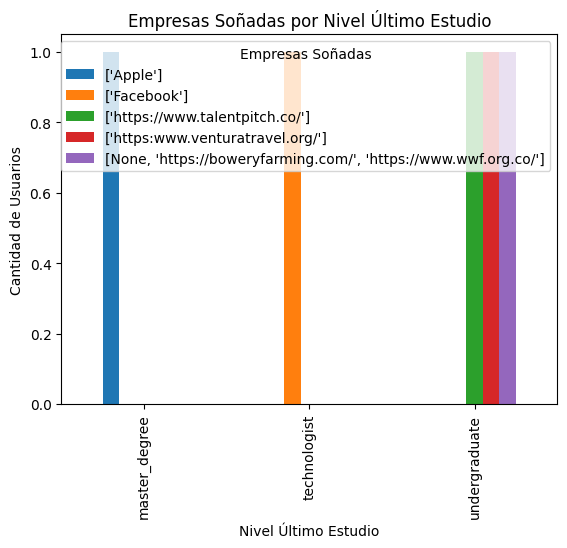

In [94]:
top_empresas_por_nivel_estudio = Usuarios_clean[Usuarios_clean['connections_sent'] > 10].groupby(['level_last_study', 'dreamt_companies'])['user_id'].count().unstack()

# Visualización: Gráfico de barras de empresas_soñadas por nivel_último_estudio
top_empresas_por_nivel_estudio.plot(kind='bar')
plt.xlabel('Nivel Último Estudio')
plt.ylabel('Cantidad de Usuarios')
plt.title('Empresas Soñadas por Nivel Último Estudio')
plt.legend(title='Empresas Soñadas')
plt.show()
